# kNN Algothrim

In [1]:
import kNN

In [2]:
from numpy import *
import operator

def createDataSet():
    group = array([
        [1.0, 1.1], 
        [1.0, 1.0], 
        [0, 0], 
        [0, 0.1],
    ])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
group, labels = createDataSet()

In [4]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [5]:
labels

['A', 'A', 'B', 'B']

In [6]:
# def classify0(inX, dataSet, labels, k):
#     '''
#     kNN
#     '''
#     dataSetSize = dataSet.shape[0]
#     diffMat = tile(inX, (dataSetSize, 1)) - dataSet
#     sqDiffMat = diffMat ** 2
#     sqDistances = sqDiffMat.sum(axis=1)
#     distances = sqDistances ** 0.5
#     sortedDisIndicies = distances.argsort()
#     classCount = {}
    
#     for i in range(k):
#         voteIlabel = labels[sortedDisIndicies[i]]
#         classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
        
#     sortedClassCount = sorted(
#         classCount.iteritems(),
#         key=operator.itemgetter(1),
#         reverse=True,
#     )
    
#     return sortedClassCount[0][0]

def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()     
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [7]:
classify0([0, 0], group, labels, 3)

'B'

# Preparing Dataset

In [8]:
def file2matrix(filename):
    love_dictionary={'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)            #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        if(listFromLine[-1].isdigit()):
            classLabelVector.append(int(listFromLine[-1]))
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

In [9]:
datingDataMat, datingLabels = file2matrix('datingTestSet.txt')

In [10]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [11]:
datingLabels[:10]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3]

# Feature analysis

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

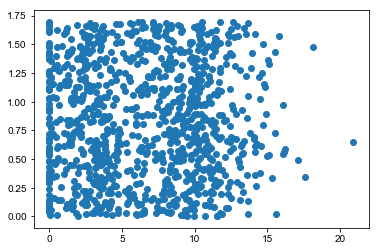

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2])
plt.show()

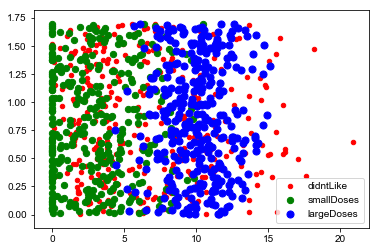

In [14]:
type1_x, type1_y = [], []
type2_x, type2_y = [], []
type3_x, type3_y = [], []

for i in range(len(datingLabels)):
    if datingLabels[i]==1:
        type1_x.append(datingDataMat[i][1])
        type1_y.append(datingDataMat[i][2])

    if datingLabels[i]==2:
        type2_x.append(datingDataMat[i][1])
        type2_y.append(datingDataMat[i][2])

    if datingLabels[i]==3:
        type3_x.append(datingDataMat[i][1])
        type3_y.append(datingDataMat[i][2])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(type1_x, type1_y, s=20, c='red', label='didntLike')
ax.scatter(type2_x,type2_y, s=40, c='green', label='smallDoses')
ax.scatter(type3_x,type3_y, s=50, c='blue', label='largeDoses')
ax.legend()
plt.show()

## Normalizing

In [15]:
def autoNorm(dataSet):
    '''
    normalization
    '''
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m, 1))
    normDataSet = normDataSet/tile(ranges, (m,1))

    return normDataSet, ranges, minVals

In [16]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [17]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [18]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [19]:
minVals

array([0.      , 0.      , 0.001156])

# Testing

In [20]:
def datingClassTest():
    '''
    test
    '''
    hoRatio = 0.50
    dataingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(
            normMat[i, :],
            normMat[numTestVecs:m, :],
            datingLabels[numTestVecs:m],
            3,
        )
#         print 'the classifier came back with: {}, the real answer is: {}'.format(
#             classifierResult, datingLabels[i])
        if (classifierResult != datingLabels[i]): 
            errorCount += 1.0
    print 'the total error rate is {}'.format(errorCount / float(numTestVecs))

In [21]:
datingClassTest()

the total error rate is 0.064


# Predictor

In [22]:
def classifyPerson():
    resultList = [
        'not at all',
        'in small doses',
        'in large doses'
    ]
    percentTats = float(raw_input('percentage of time spent palying video games?'))
    ffMiles = float(raw_input('frequenct flier miles earned per year?'))
    iceCream = float(raw_input('liters of ice cream consumed per year?'))
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr-minVals)/ranges, normMat, datingLabels, 3)
    print 'You will probably like this person: {}'.format(resultList[classifierResult - 1])

In [23]:
classifyPerson()

percentage of time spent palying video games?10
frequenct flier miles earned per year?10000
liters of ice cream consumed per year?0.5
You will probably like this person: in small doses


# A handwriting recognition system

In [24]:
def img2vector(filename):
    returnVect = zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    return returnVect

In [25]:
testVector = img2vector('digits/testDigits/0_13.txt')

In [26]:
testVector[0, :31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
testVector[0, 32:63]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
from os import listdir

def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('digits/trainingDigits')           #load the training set
    m = len(trainingFileList)
    
    # training data
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('digits/trainingDigits/{}'.format(fileNameStr))
    
    # test data
    testFileList = listdir('digits/testDigits')        #iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('digits/testDigits/{}'.format(fileNameStr))
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        if (classifierResult != classNumStr): 
            errorCount += 1.0
        
    print "\nthe total number of errors is: {}".format(errorCount)
    print "\nthe total error rate is: {}".format(errorCount/float(mTest))

In [29]:
handwritingClassTest()


the total number of errors is: 12.0

the total error rate is: 0.0126849894292
